# Evolutionary Dynamics


This is part of **part 3** of Nathaniel Virgo's lectures on population dynamics and evolutionary dynamics, as part of the ELSI course.

---

You can download this notebook and run it locally if you have Python installed, but you can also access it online.

---

Now let's plot it. The behaviour depends on the parameters. First let's define a function as I did before:

In [15]:
# setup code - run this first.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['figure.figsize'] = [10, 10]

# a convenient function for plotting - put the axes at x=0, y=0.
def center_axes():
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    
    
# helper function
def rand_range(low, hi):
    return np.random.random()*(hi-low) + low

# a version that's biased toward the low end, which makes better plots
def rand_range_biased(low, hi):
    return np.random.random()*(np.random.random()*0.5+0.5)*(hi-low) + low


def plot_competition(a, b, c, d, e, f, x_range, y_range):
    # a, b, c, d, e, f are the parameters
    # x_range and y_range should be of the form [min_x, max_x] and [min_y, max_y].
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    
    results = []
    
    for i in range(15):
        # solve and plot the equations from a few random starting points
        
        def lotka_volterra_competition(t, state):
            x, y = state
            dx = x*(a - b*x - c*y)
            dy = y*(d - e*x - f*y)
            return [dx,dy]

        t_span = (0.0,80.0)
        t_points = np.linspace(t_span[0], t_span[1], 1000)

        initial_state = [rand_range_biased(*x_range), rand_range_biased(*y_range)]

        result = solve_ivp(lotka_volterra_competition, t_span, initial_state, t_eval=t_points, method='RK45', rtol=1e-10, atol=1e-10)
        
        plt.plot(result.y[0,:], result.y[1,:])
        
        results.append(result)
    
    plt.title("Lotka-Volterra competition equations (phase plot)")
    
    # x isocline
    x = np.array([0.1,20])
    y = (a-b*x)/c 
    plt.plot(x,y,'k:',label="$dx_1/dt=0$",scalex=False, scaley=False)

    # y isocline
    x = np.array([0.1,20])
    y = (d-e*x)/f
    plt.plot(x,y,'k--',label="$dx_2/dt=0$",scalex=False, scaley=False)

    plt.xlabel("Species 1")
    plt.ylabel("Species 2")
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    center_axes()
    plt.legend()
    
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect(5.0)
    
    plt.title("Lotka-Volterra competition equations (time series)")
    plt.ylabel("population")
    plt.xlabel("time")

    for result in results:
        prev = plt.plot(result.t, result.y[0,:])
        plt.plot(result.t, result.y[1,:], "--", color = prev[0].get_color())

    plt.xlim(*t_span)

    plt.show()

First we see what happens if two species are the same. Then we will try changing one slightly.

First, recall what happens when the interspecific competition is
 * less than intraspecific competition
 * more than intraspecific competition
 
Can you get what happens if they are *equal*? To find out, set $a_{11} = a_{22} = a_{21} = a_{12} = 0.2$.

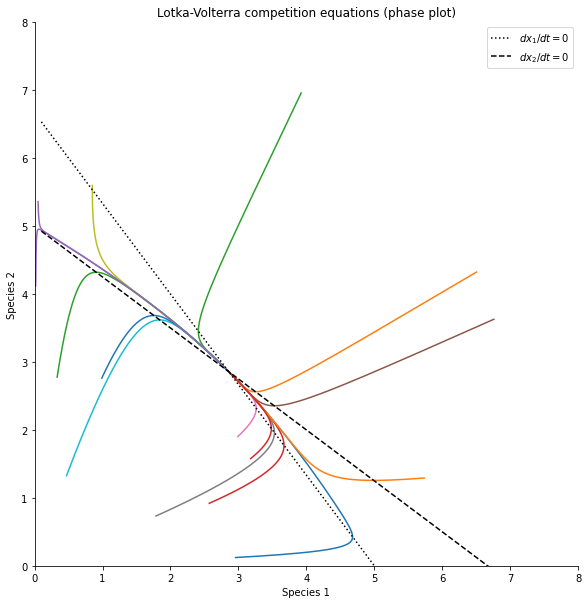

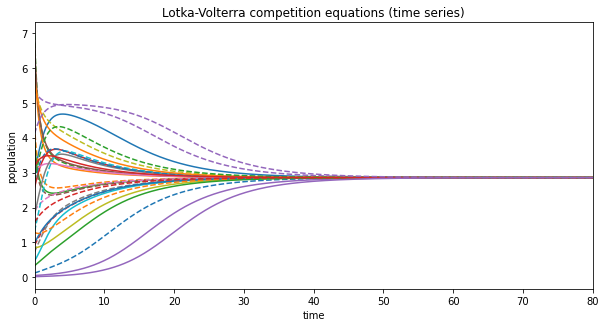

In [21]:
# intrinsic growth rates
b1 = 1
b2 = 1

# intraspecific competition for type 1
a11 = 0.2

# intraspecific competition for type 2
a22 = 0.2

# negative effect of species 2 on type 1
a12 = 0.15

# negative effect of spdcies 1 on type 2
a21 = 0.15



# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(b1, a11, a12, b2, a21, a22, [0,8], [0,8])

Next let's see what happens if species 2 (the mutant) has a higher growth rate

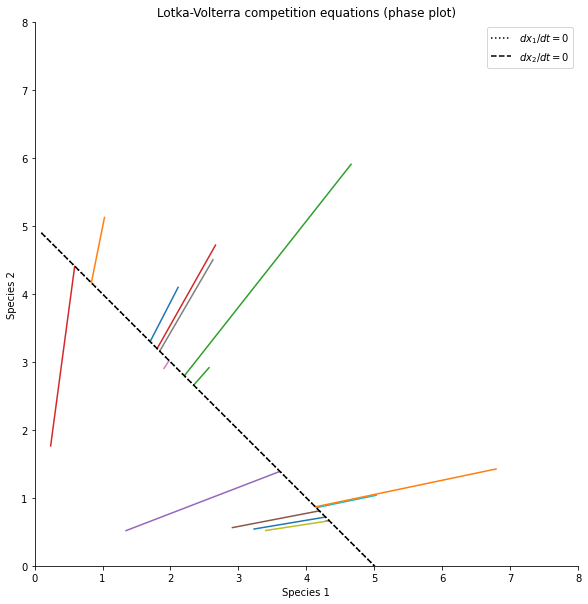

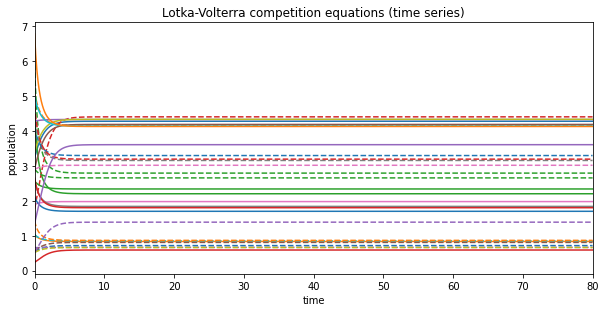

In [26]:


# intrinsic growth rates
b1 = 1
b2 = 1 # change this to 1.2. Try different values and check the time series.



# intraspecific competition for type 1
a11 = 0.2

# negative effect of species 2 on type 1
a12 = 0.2

# negative effect of spdcies 1 on type 2
a21 = 0.2

# intraspecific competition for type 2
a22 = 0.2


# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(b1, a11, a12, b2, a21, a22, [0,8], [0,8])

Sometimes there is a trade-off. A mutation might increase the growth rate, but also increase intraspecific competition, for example. Here's what happens:

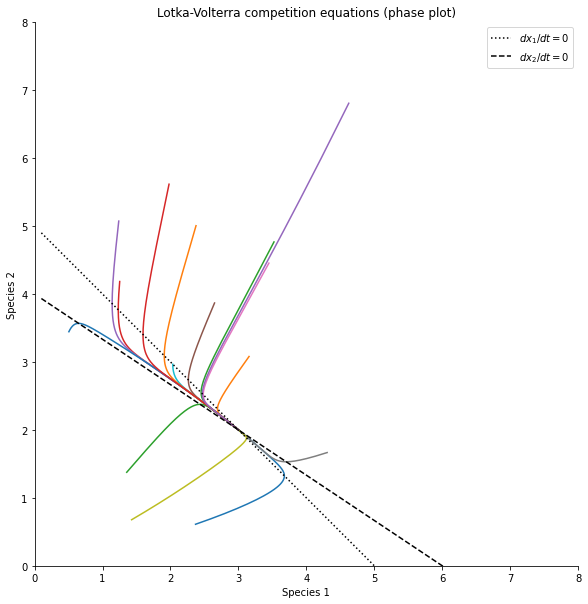

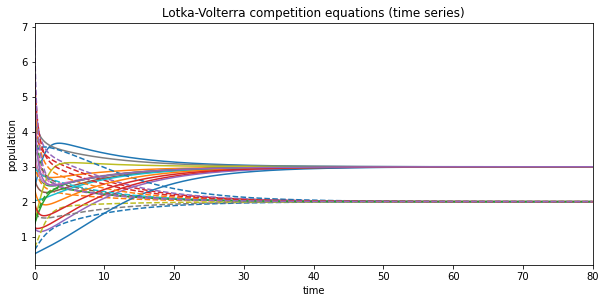

In [18]:
# intrinsic growth rates
b1 = 1
b2 = 1.2

# intraspecific competition for type 1
a11 = 0.2

# negative effect of species 2 on type 1
a12 = 0.2

# negative effect of spdcies 1 on type 2
a21 = 0.2

# intraspecific competition for type 2
a22 = 0.3


# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(b1, a11, a12, b2, a21, a22, [0,8], [0,8])

In this case, the mutant can invade but it doesn't go to fixation. Instead, both types coexist.

Another mutation might do the opposite, decreasing growth rate but increasing intraspecific competition:

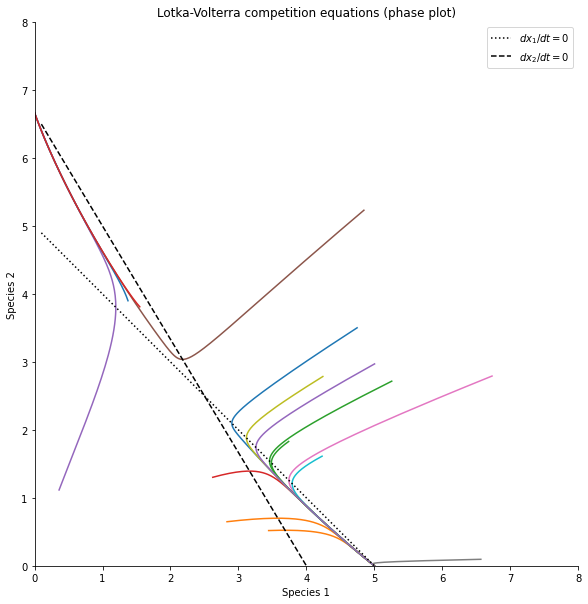

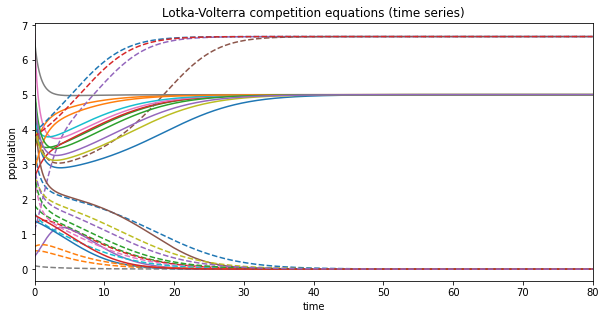

In [19]:
# intrinsic growth rates
b1 = 1
b2 = 0.8

# intraspecific competition for type 1
a11 = 0.2

# negative effect of species 2 on type 1
a12 = 0.2

# negative effect of spdcies 1 on type 2
a21 = 0.2

# intraspecific competition for type 2
a22 = 0.12


# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(b1, a11, a12, b2, a21, a22, [0,8], [0,8])

Now the mutant can't invade, so it will go extinct, even though its carrying capacity is higher than the original type.